# DATA UNDERSTANDING

## Dataset Summary

This dataset provides key financial and credit details for loan applicants, such as loan amount, credit score, income, debt, and credit history. It is useful for predicting loan defaults and assessing credit risk. Financial institutions, analysts, and fintech platforms can leverage it to make informed, data-driven lending decisions and improve risk management.

## Business Problem

Financial institutions face significant risk when offering loans. Without an effective way to assess risk, they may approve loans for high-risk individuals, leading to default and financial loss.

**Business Problem:**
How can we predict the likelihood of a customer defaulting on a loan using their credit and personal financial data?

## Objectives

Build a predictive model to assess credit risk or likelihood of default.

**Goals:**

Understand key features influencing creditworthiness.

Enable better loan decision-making and risk management.

Minimize default rates and improve portfolio health.

## Methodology

Here’s a general roadmap for solving this problem:

**Step 1: Data Preprocessing**

Handle missing values 

Encode categorical features 

Normalize/scale numerical data

Detect and treat outliers if needed

**Step 2: Exploratory Data Analysis (EDA)**

Visualize distributions, relationships, and feature importance

Check correlation matrix for multicollinearity

**Step 3: Feature Engineering**

Derive new features 

Convert employment duration to numerical values

**Step 4: Model Building**

Train classification models like:

Logistic Regression

Random Forest

**Step 5: Model Evaluation and Deployment**

Perform cross-validation

Optimize using hyperparameter tuning 

Deploy best model for real-time predictions or batch scoring

✅ Expected Output

A machine learning model that can predict credit risk based on customer information, potentially generating a binary prediction:

0 = Low Risk (likely to repay)

1 = High Risk (likely to default)

## Load and Inspect the Data

In [1]:
# Import Libraries

# Data Preprocessing
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Model Building
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df=pd.read_csv("credit_train.csv")

In [3]:
# Checking the data shape
df.shape

(100514, 19)

The dataset has 100,514 rows and 19 columns,

In [4]:
# Checking the data head
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


From inspecting the first five rows above, we observe that all loans in the sample are Fully Paid, with most being Short Term. Borrowers commonly use loans for Debt Consolidation and Home Improvements. Some records lack Credit Score and Annual Income data. Despite high Current Loan Amounts (one with an extreme outlier of 99,999,999), most borrowers show stable credit histories, minimal bankruptcies, and no tax liens.

In [5]:
# Checking the data tail
df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From inspecting the last five rows above, we observe that the last few records in the dataset contain only missing values (NaN) across all columns. These rows likely represent corrupted, incomplete, or placeholder entries and should be removed during data cleaning to ensure accurate analysis and model training.

In [6]:
df['Loan Status'].unique()

array(['Fully Paid', 'Charged Off', nan], dtype=object)

In [7]:
# Creating New Target column
df['Loan_Status_Binary'] = np.where(df['Loan Status'] == 'Fully Paid', 1, 0)

In [8]:
# Checking the data size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

From the above output we observe that the dataset contains 100,514 entries and 20 columns, but only 100,000 rows have complete loan-related data, the remaining 514 rows are empty or partially missing. Key columns like Credit Score and Annual Income have about 20% missing values, while "Months since last delinquent" is missing in over 53% of rows. Data cleaning is necessary, including removing empty rows, handling missing values, and possibly imputing or dropping incomplete columns for accurate modeling.

In [9]:
# Discriptive statistics
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan_Status_Binary
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000,100514.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313,0.769654
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182,0.421056
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000,1.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000,1.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000,1.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000,1.000000


From the observation above the dataset has extreme outliers in key numeric fields such as Current Loan Amount, Annual Income, Monthly Debt, and Maximum Open Credit, with values far above the 75th percentile (e.g., income max is 165M vs. median 1.17M). The average credit score is about 1076, but this is skewed by outliers (normal scores usually range 300–850). Also, missing data exists in fields like Credit Score and Months since last delinquent. Data normalization and outlier handling will be essential for reliable analysis and modeling.

In [10]:
# Checking the unique values
df.nunique()

Loan ID                         81999
Customer ID                     81999
Loan Status                         2
Current Loan Amount             22004
Term                                2
Credit Score                      324
Annual Income                   36174
Years in current job               11
Home Ownership                      4
Purpose                            16
Monthly Debt                    65765
Years of Credit History           506
Months since last delinquent      116
Number of Open Accounts            51
Number of Credit Problems          14
Current Credit Balance          32730
Maximum Open Credit             44596
Bankruptcies                        8
Tax Liens                          12
Loan_Status_Binary                  2
dtype: int64

From the above observation the dataset contains 81,999 unique loans, each tied to a unique customer. Target variable Loan_Status_Binary has 2 classes, indicating a binary classification task. Several features, like Purpose (16 values), Home Ownership (4), and Years in current job (11), are categorical with manageable cardinality, suitable for encoding. Numerical features such as Monthly Debt, Annual Income, and Current Credit Balance show high diversity, while columns like Credit Score and Months since last delinquent have fewer distinct values, suggesting potential grouping or binning may improve model performance.

In [11]:
df['Purpose'].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'Other', 'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy', nan],
      dtype=object)

In [12]:
df['Purpose'] = df['Purpose'].str.strip().str.lower().str.replace(' ', '_')

In [13]:
df['Purpose'].unique()

array(['home_improvements', 'debt_consolidation', 'buy_house', 'other',
       'business_loan', 'buy_a_car', 'major_purchase', 'take_a_trip',
       'small_business', 'medical_bills', 'wedding', 'vacation',
       'educational_expenses', 'moving', 'renewable_energy', nan],
      dtype=object)

In [14]:
df['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage', nan],
      dtype=object)

In [15]:
df['Home Ownership'] = df['Home Ownership'].str.strip().str.lower().str.replace(' ', '_')

In [16]:
df['Home Ownership'].unique()

array(['home_mortgage', 'own_home', 'rent', 'havemortgage', nan],
      dtype=object)

In [17]:
df['Home Ownership'] = df['Home Ownership'].replace('havemortgage', 'home_mortgage')

In [18]:
df['Home Ownership'].unique()

array(['home_mortgage', 'own_home', 'rent', nan], dtype=object)

In [19]:
# Check the missing values
df.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
Loan_Status_Binary                  0
dtype: int64

From the last 514 rows in the dataset appear to be incomplete or corrupted entries. Most columns have only 514 non-null values, while key fields like Credit Score, Annual Income, and Months since last delinquent have much higher non-null counts, likely due to earlier valid records. The Loan_Status_Binary has no values (0 non-null), confirming these rows lack target labels and should be dropped before training any predictive model.

In [20]:
# Checking the missing Value in percentage
df.isnull().sum()/df.shape[0]*100

Loan ID                          0.511372
Customer ID                      0.511372
Loan Status                      0.511372
Current Loan Amount              0.511372
Term                             0.511372
Credit Score                    19.567423
Annual Income                   19.567423
Years in current job             4.711781
Home Ownership                   0.511372
Purpose                          0.511372
Monthly Debt                     0.511372
Years of Credit History          0.511372
Months since last delinquent    53.380624
Number of Open Accounts          0.511372
Number of Credit Problems        0.511372
Current Credit Balance           0.511372
Maximum Open Credit              0.513361
Bankruptcies                     0.714328
Tax Liens                        0.521320
Loan_Status_Binary               0.000000
dtype: float64

Most columns have ~0.5% missing values, corresponding to the 514 invalid rows. However, critical features like Credit Score and Annual Income are missing in nearly 20% of entries, and Months since last delinquent is missing in over 53%, which may affect model performance. Loan_Status_Binary is completely missing in those rows. You should drop the 514 fully/mostly empty rows, and consider imputing or dropping high-missing columns like Months since last delinquent based on their importance to the model.

In [21]:
# Finding the dublicates values
df.duplicated().sum()

np.int64(10728)

10,728 duplicate rows were found in the dataset.

In [22]:
# Identifying gabage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*5)

Loan ID
cdf2f31f-f04e-45f9-9ce2-2399235cd6fb    2
0c14cb77-29a3-4964-9198-0c43f5f982b0    2
578c8e10-3214-4491-bdbc-b1695ef8ff87    2
7aa649ff-b73b-4556-a4c3-a4d35762809a    2
24e8c8bd-d10b-4dac-8b81-1da470ff5ecb    2
                                       ..
2a0c450f-44ff-4014-a319-ef59e17ea5d5    1
40617302-5cb1-4db8-9867-ade39c1751dc    1
2ff2c5d0-bf24-4241-a9b4-8eeaff8724ab    1
604de9e3-1cef-41ff-a334-8f798c2ddd19    1
0ee71c4c-10ca-4849-b437-314317022f62    1
Name: count, Length: 81999, dtype: int64
***************
Customer ID
56a0ba34-abcd-413a-8c82-0fc0404bec6f    2
9baf6d5d-f744-4332-abb0-e939b75cde40    2
cbe53e22-ba67-4eaf-a4fb-c5acdd12ec66    2
54f57722-2473-4dd8-b69b-82b5b0c1c9f9    2
967e8733-7189-49b7-a3ab-6a1d0e1abdac    2
                                       ..
8583fc23-bf8d-434b-b33d-1c8152e3e254    1
f423f0f1-ee1c-4cca-ab91-b8c349b24fcf    1
4ec8ccaf-9aeb-45b7-aa58-b46f9c3dac2e    1
4b5fda6f-cbe5-46a1-b167-fc31d87d0d72    1
05979eaa-82f7-4909-8cbb-548bd44d1b02    1

The dataset has duplicate Loan ID and Customer ID values, indicating some customers or loans appear more than once. Most loans are Fully Paid (77%), with the rest Charged Off (23%). Short Term loans dominate (72%), and “Debt Consolidation” is the primary loan purpose (78.5%). Most borrowers are either homeowners with mortgages or renters, and the largest group has 10+ years in the same job, suggesting a generally stable borrower profile. These trends can help guide segmentation and modeling strategies.

# DATA CLEANING AND PREPROCESSING

Credit Score & Annual Income → 22.54% missing each
➤ These are critical variables for loan analysis. Recommend median imputation,

Years in current job → 7.53% missing
➤ Imputable using mode,

Bankruptcies (3.62%) & Tax Liens (3.42%)
➤ These are often 0 by default, so can be imputed safely using 0 or mode.

Low Missing Rate (Negligible Impact):
Most other features (e.g., Loan ID, Current Loan Amount, Monthly Debt, etc.) → ~3.4% missing
➤ Can be safely imputed or rows dropped with minimal data loss (~3.4% = 353 rows).

Drop the 353 rows that consistently miss basic values if they can't be reliably imputed and represent a small portion (~3.4%) of the dataset.

ankruptcies, Tax Liens: Likely to be 0, or use mode.

## step 1 : Handling missing Values

In [397]:
# Dropping rows with less 353
columns = ['Loan ID', 'Customer ID','Current Loan Amount', 'Term', 'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit']

df = df.dropna(subset=columns)

In [398]:
df.shape

(99998, 20)

In [399]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19153
Annual Income                   19153
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      204
Tax Liens                          10
Loan_Status_Binary                  0
dtype: int64

We will drop Bankruptcies and Tax Liens becouse they are few, that id 22 and 1 missing rows respectively

In [400]:
# Dropping rows with less 353
columns = ['Bankruptcies', 'Tax Liens']

df = df.dropna(subset=columns)

In [401]:
# Impute missing values with the median of each column
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())

In [402]:
# Impute missing values with the mode of each column
df['Years in current job'] = df['Years in current job'].fillna(df['Years in current job'].mode().iloc[0])
df['Months since last delinquent'] = df['Months since last delinquent'].fillna(df['Months since last delinquent'].mode().iloc[0])


In [403]:
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
Loan_Status_Binary              0
dtype: int64

From the output above we see we do no longer have missing values

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99794 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       99794 non-null  object 
 1   Customer ID                   99794 non-null  object 
 2   Loan Status                   99794 non-null  object 
 3   Current Loan Amount           99794 non-null  float64
 4   Term                          99794 non-null  object 
 5   Credit Score                  99794 non-null  float64
 6   Annual Income                 99794 non-null  float64
 7   Years in current job          99794 non-null  object 
 8   Home Ownership                99794 non-null  object 
 9   Purpose                       99794 non-null  object 
 10  Monthly Debt                  99794 non-null  float64
 11  Years of Credit History       99794 non-null  float64
 12  Months since last delinquent  99794 non-null  float64
 13  Number

# EXPLORATORY DATA ANALYSIS (EDA)

Visualizations to Include:
Distribution plots for numerical features

Count plots for categorical features

Correlation heatmap

Boxplots to detect outliers

Pairplot for key numerical relationships (optional if performance is a concern)

## Step 1 - Handling Outliers

In [405]:
# Define the columns you want to check for outliers
major_columns = ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Years of Credit History', 'Number of Open Accounts', 'Maximum Open Credit']

# Calculate IQR for each column
Q1 = df[major_columns].quantile(0.25)
Q3 = df[major_columns].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR
outliers = ((df[major_columns] < (Q1 - 1.5 * IQR)) | (df[major_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Print number of outliers
print("Number of outliers detected:")
print(outliers.sum())

Number of outliers detected:
32691


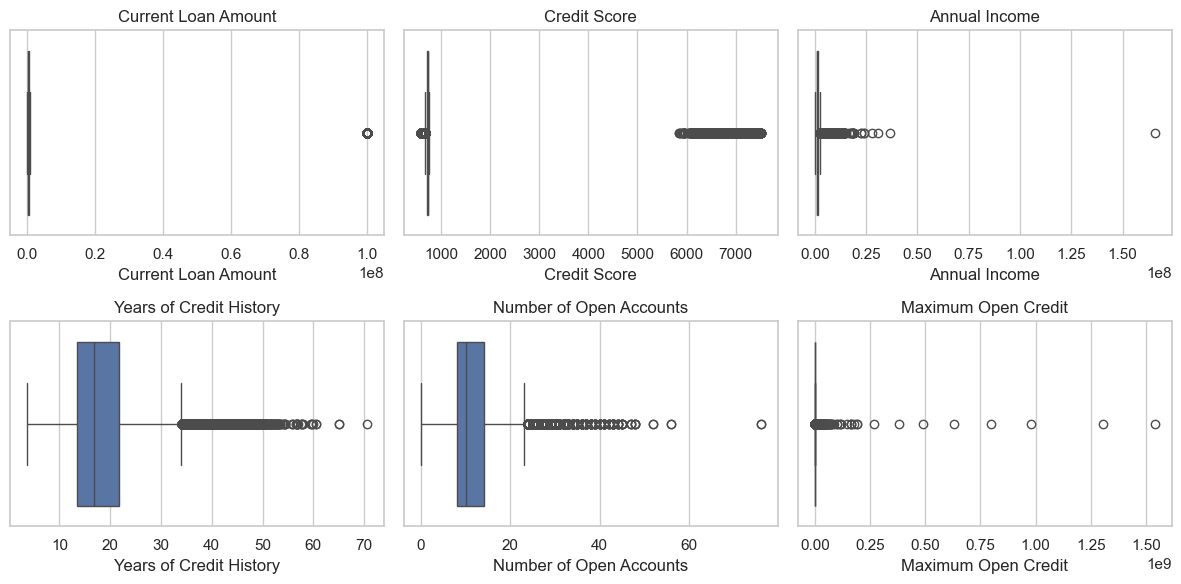

In [406]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Create box plots for each column using Seaborn
for i, col in enumerate(major_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show();

## Removing Outliers

In [407]:
def handle_outliers(df, columns, method='iqr', threshold=1.5):
    df_cleaned = df.copy()
    #df_cleaned['Purpose'] = df_cleaned['Purpose'].str.strip().str.lower().str.replace(' ', '_')
    
    for column in columns:
        if method == 'iqr':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            df_cleaned[column] = df_cleaned[column].clip(lower_bound, upper_bound)
        
        elif method == 'percentile':
            lower_bound = df[column].quantile(0.01)
            upper_bound = df[column].quantile(0.99)
            df_cleaned[column] = df_cleaned[column].clip(lower_bound, upper_bound)
    
    return df_cleaned

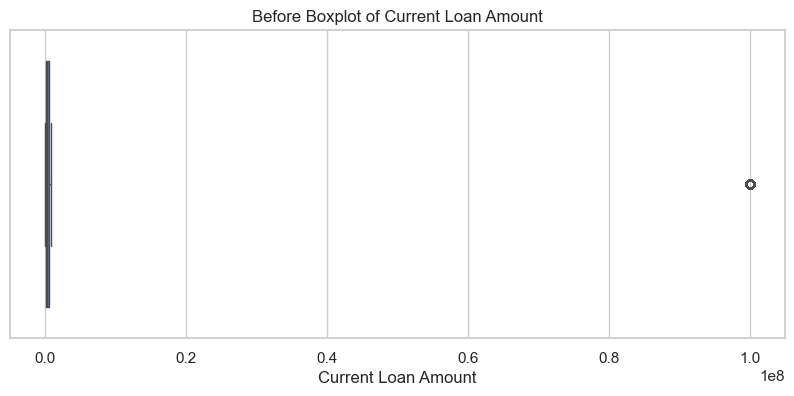

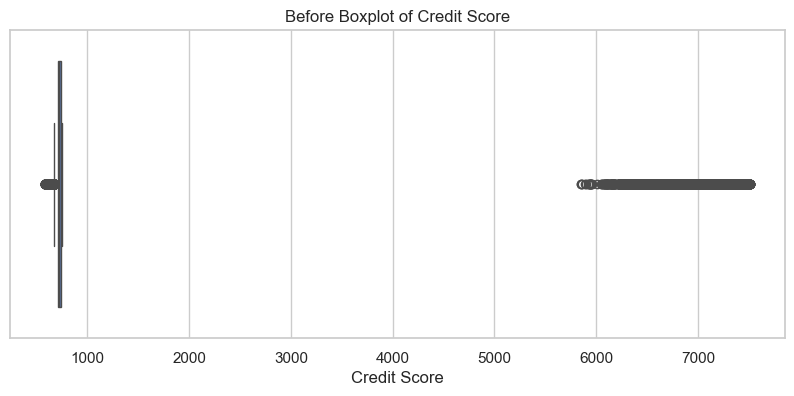

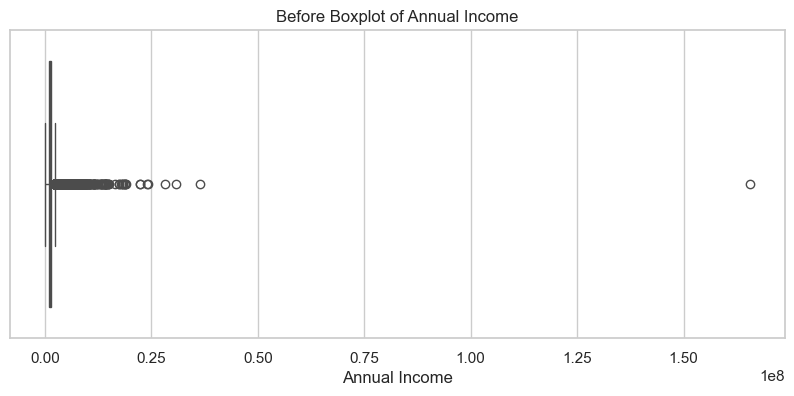

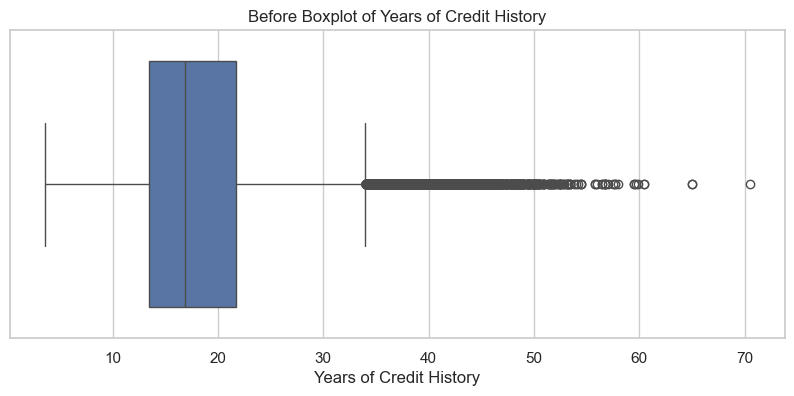

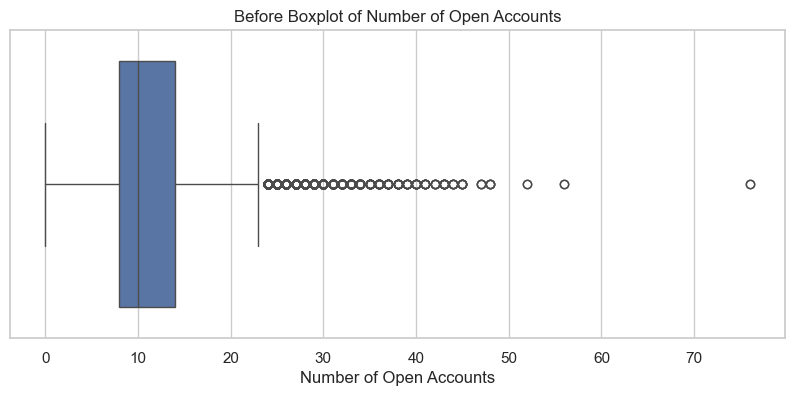

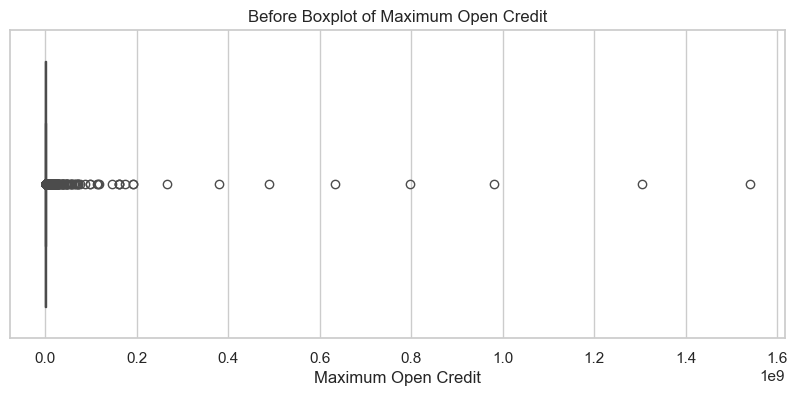

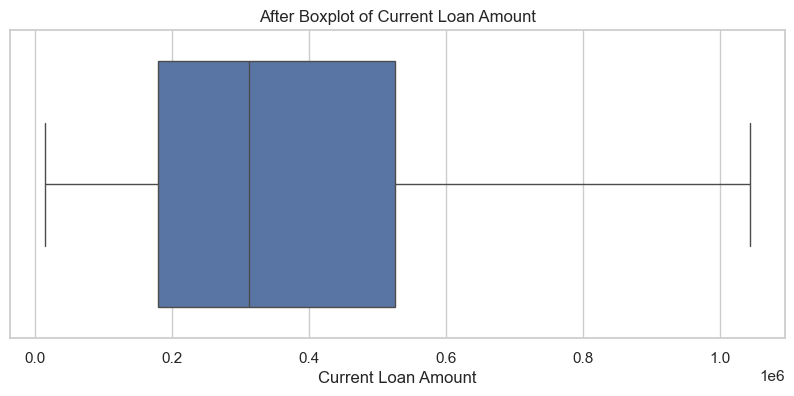

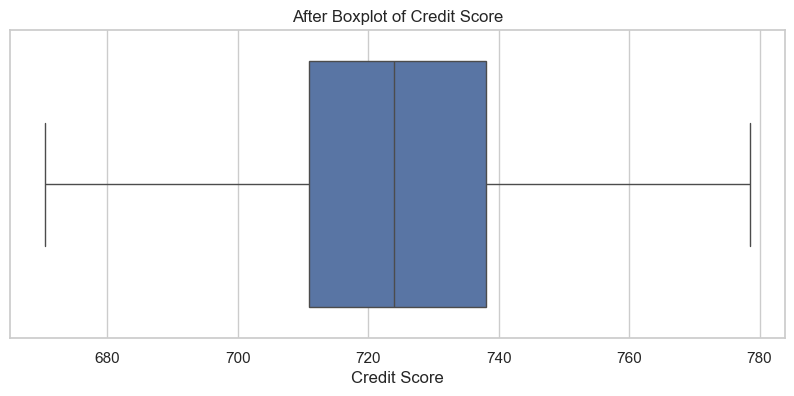

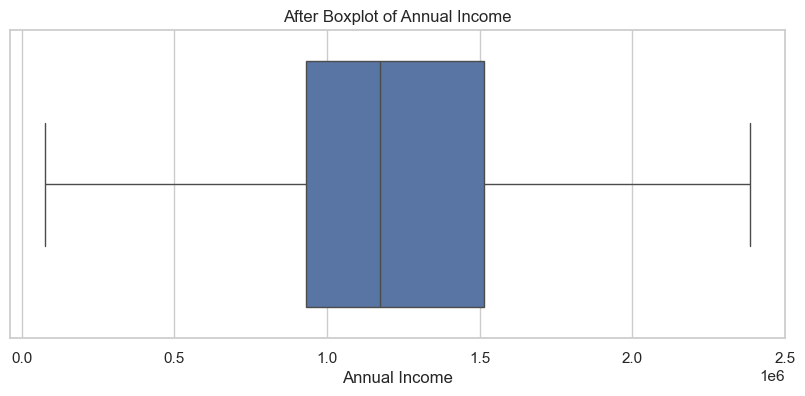

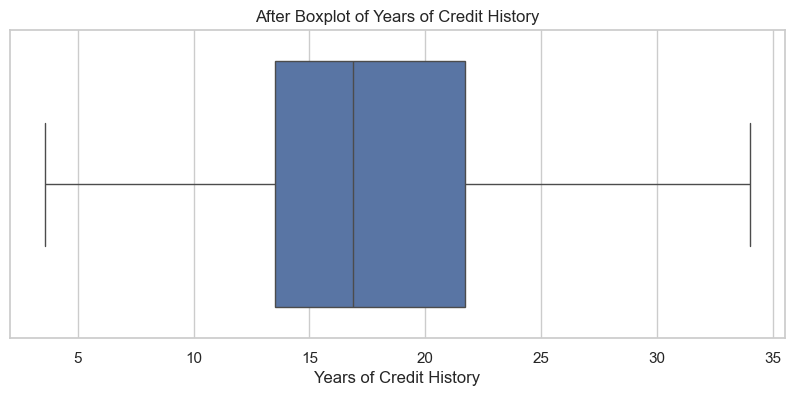

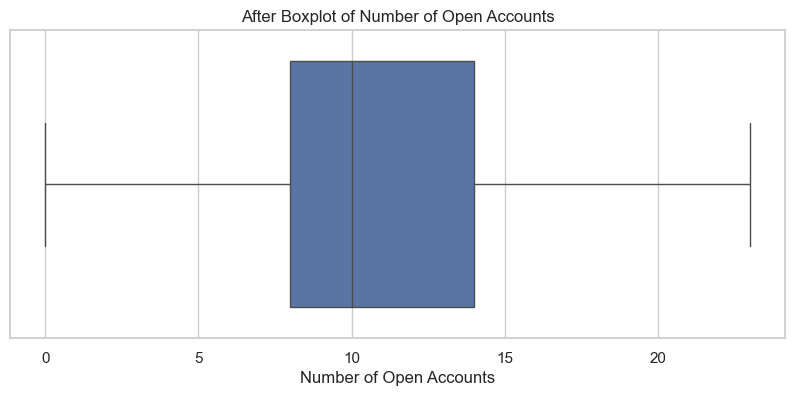

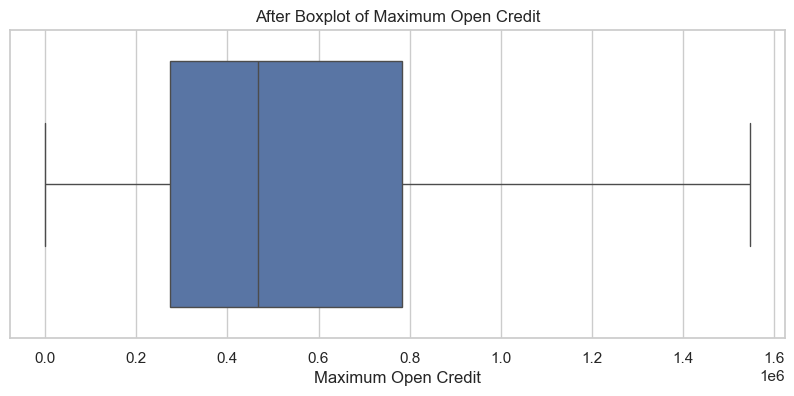

In [408]:

# Original columns with potential outliers
columns_to_check = ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Years of Credit History', 'Number of Open Accounts', 'Maximum Open Credit']  # Replace with your actual column names

# Visualize BEFORE outlier handling
def visualize_outliers(df, columns, title_prefix=''):
    for col in columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df[col])
        plt.title(f'{title_prefix} Boxplot of {col}')
        plt.xlabel(col)
        plt.show()

# Before cleaning
visualize_outliers(df, columns_to_check, title_prefix='Before')

# Apply outlier handling
df_cleaned = handle_outliers(df, columns_to_check, method='iqr', threshold=1.5)

# After cleaning
visualize_outliers(df_cleaned, columns_to_check, title_prefix='After')


## Distribution of data for the major columns

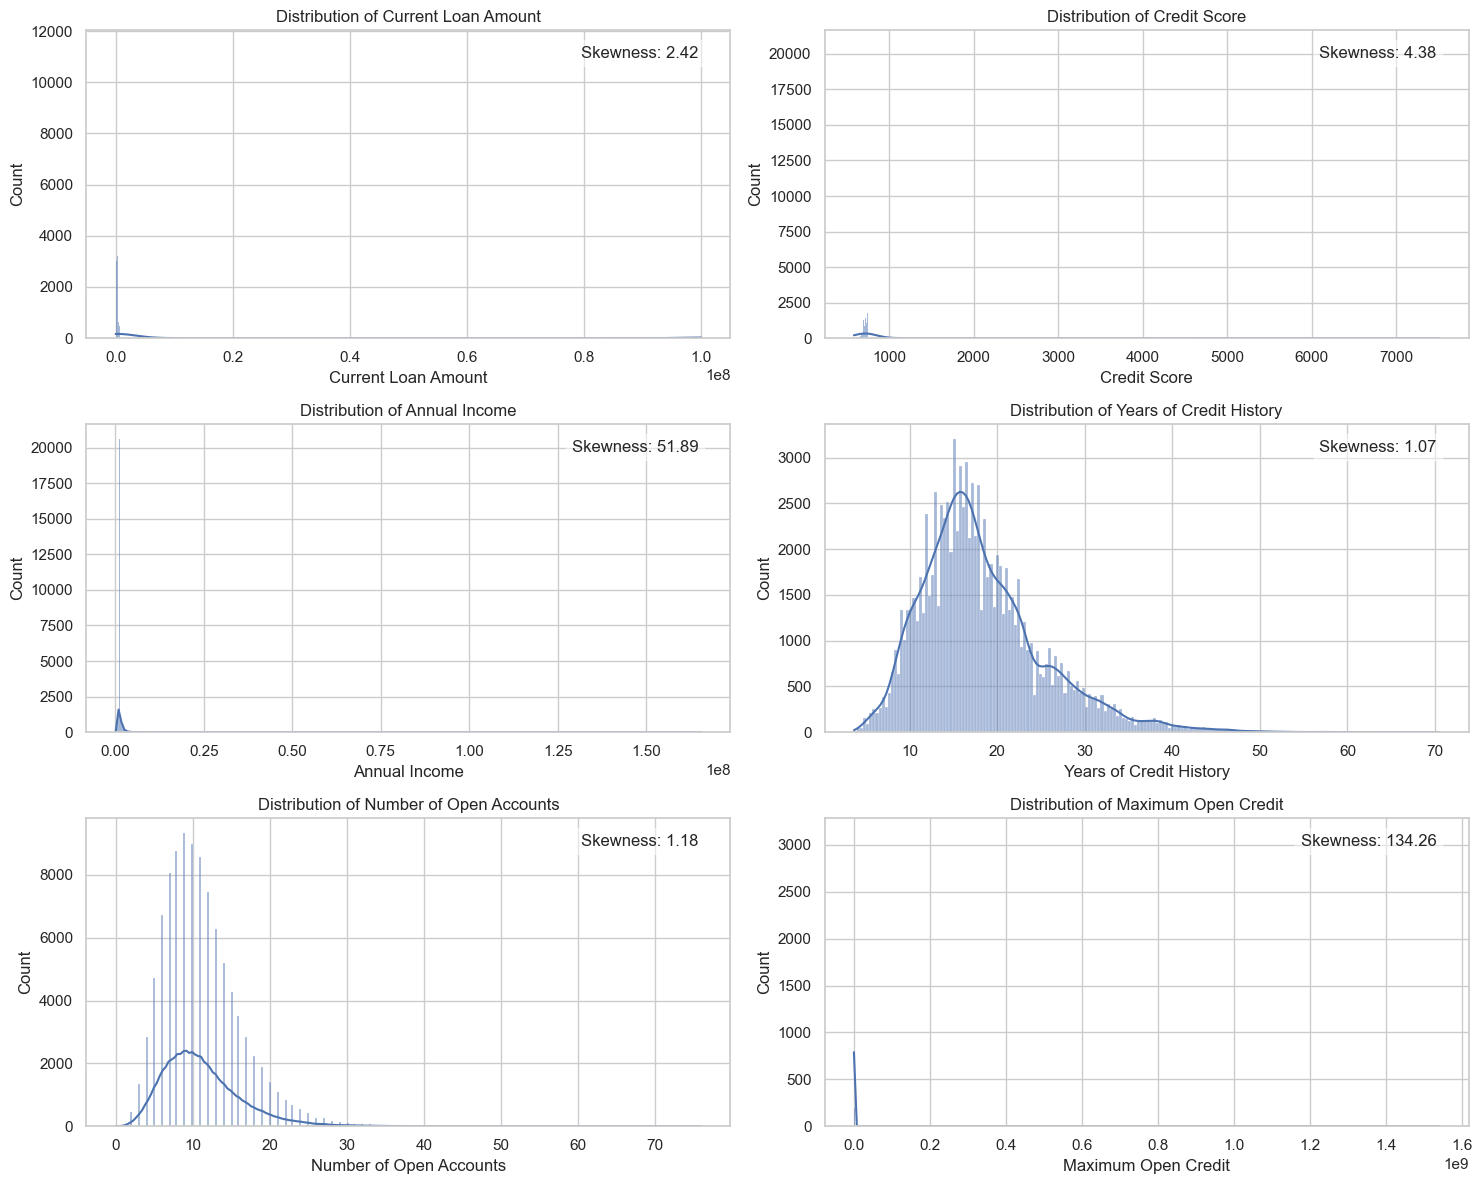

In [409]:
def plot_distributions(df, columns, n_cols=2, figsize=(15, 4)):
    n_rows = (len(columns) - 1) // n_cols + 1
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize[0], figsize[1] * n_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

    for i, column in enumerate(columns):
        ax = axes[i]
        sns.histplot(df[column], kde=True, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')

        # Add skewness value to the plot
        skewness = df[column].skew()
        ax.text(0.95, 0.95, f'Skewness: {skewness:.2f}', 
                horizontalalignment='right', verticalalignment='top', 
                transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Usage
columns_to_plot = ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Years of Credit History', 'Number of Open Accounts', 'Maximum Open Credit']
plot_distributions(df, columns_to_plot);

In [410]:
# Set style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

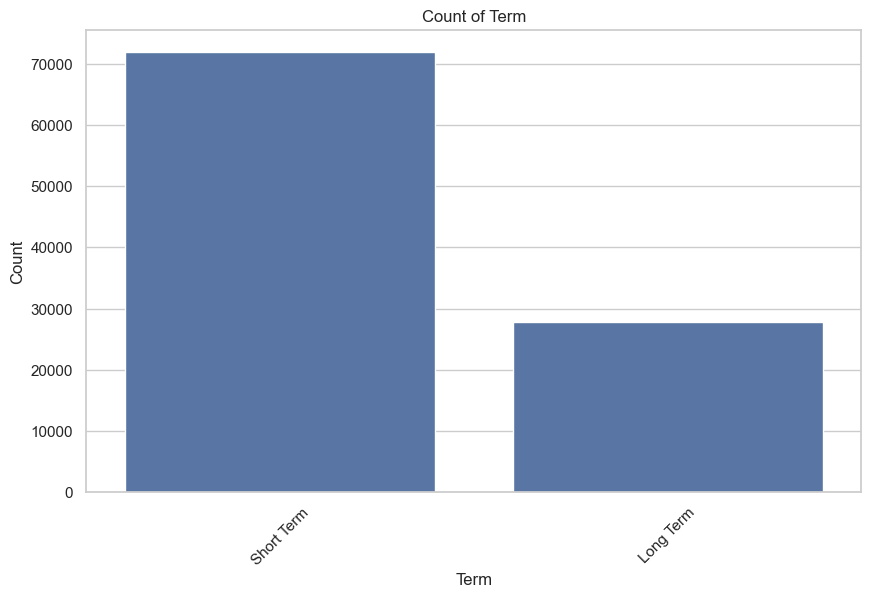

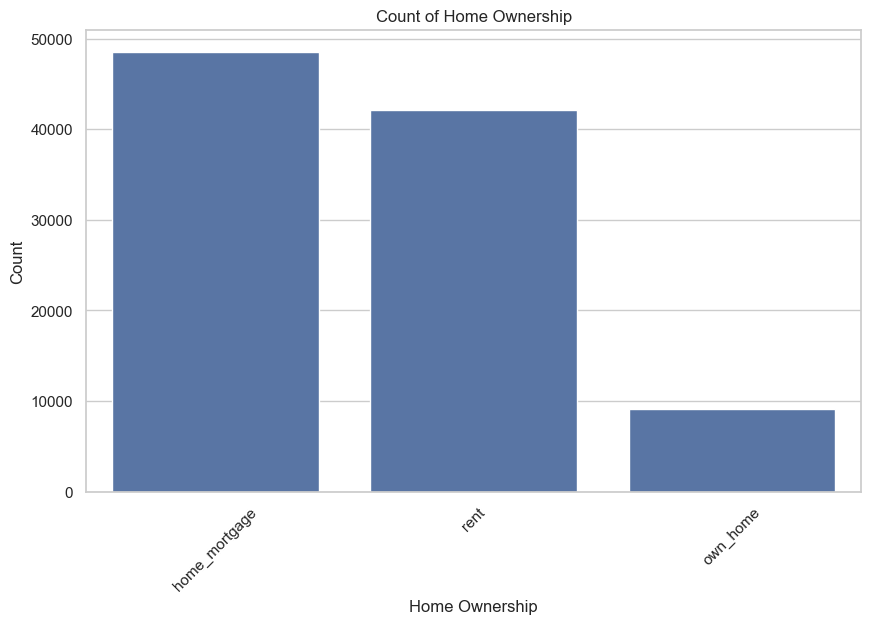

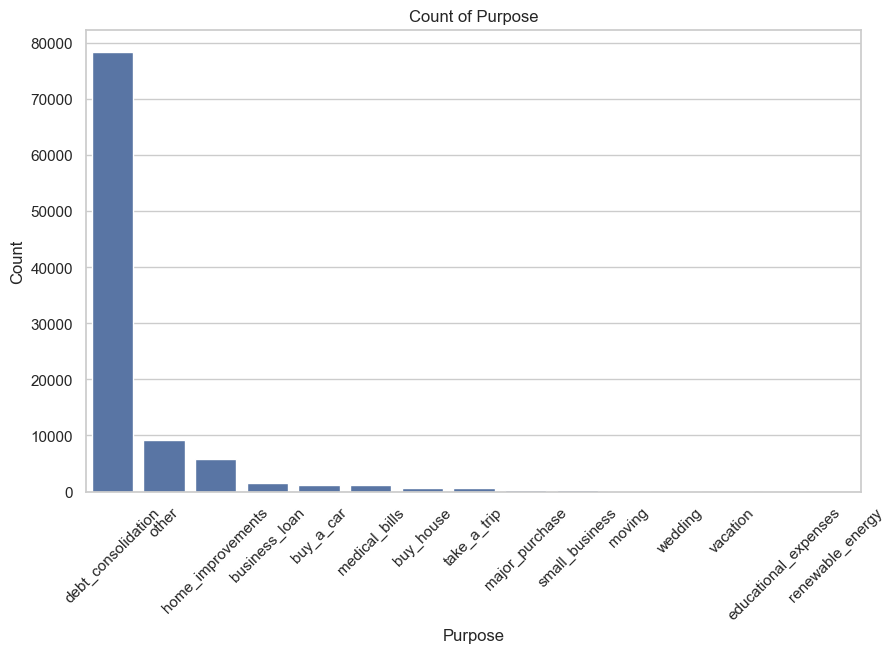

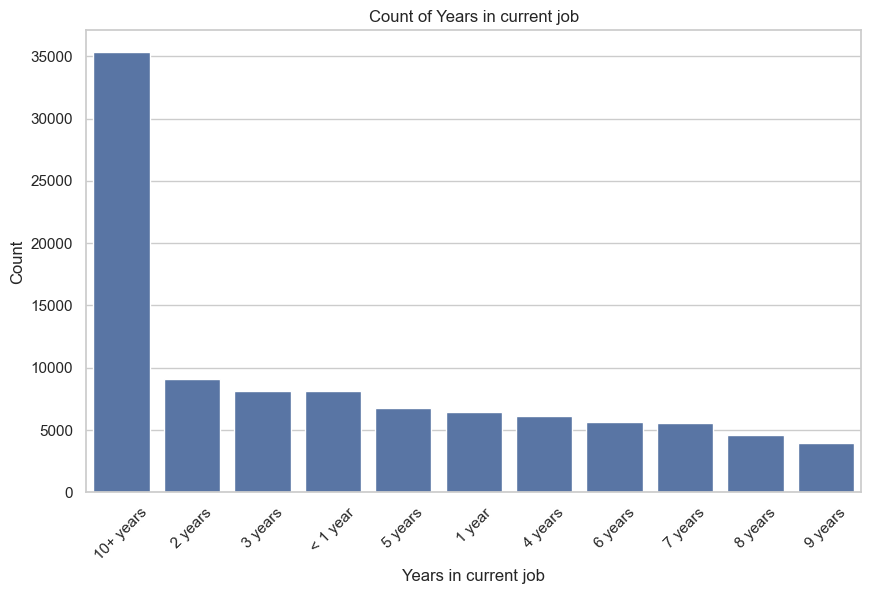

In [411]:
# 2. Count plots for categorical features
categorical_features = ['Term', 'Home Ownership', 'Purpose', 'Years in current job']

for col in categorical_features:
    plt.figure()
    sns.countplot(data=df_cleaned, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.show()

In [413]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99794 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       99794 non-null  object 
 1   Customer ID                   99794 non-null  object 
 2   Loan Status                   99794 non-null  object 
 3   Current Loan Amount           99794 non-null  float64
 4   Term                          99794 non-null  object 
 5   Credit Score                  99794 non-null  float64
 6   Annual Income                 99794 non-null  float64
 7   Years in current job          99794 non-null  object 
 8   Home Ownership                99794 non-null  object 
 9   Purpose                       99794 non-null  object 
 10  Monthly Debt                  99794 non-null  float64
 11  Years of Credit History       99794 non-null  float64
 12  Months since last delinquent  99794 non-null  float64
 13  Number

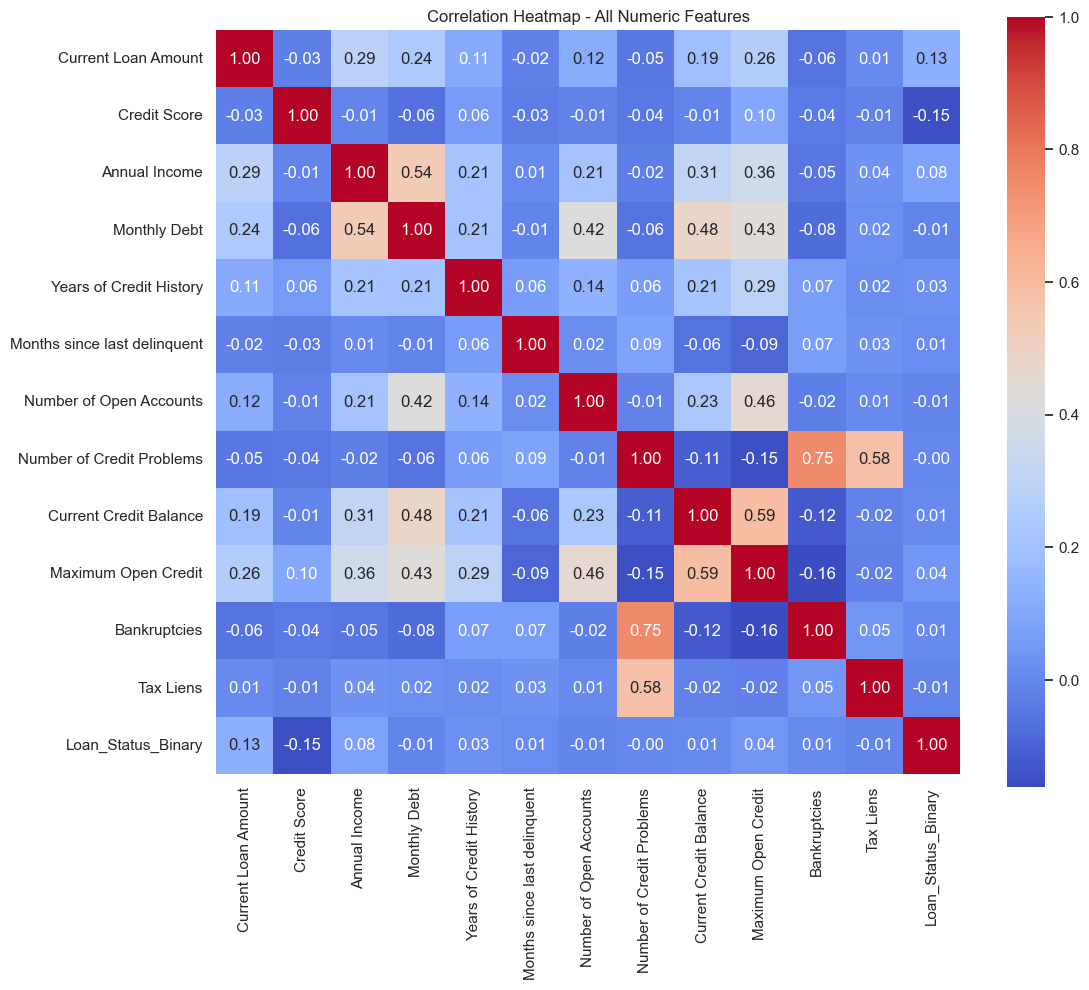

In [414]:
plt.figure(figsize=(12, 10))
# Select only numeric columns including your target
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
corr = df_cleaned[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap - All Numeric Features")
plt.show()

# Step 5 - Normalization using standard scaler

In [416]:
def normalize_data(df, columns, method='log'):
    df_normalized = df_cleaned()
    
    for column in columns:
        if method == 'log':
            # Add a small constant to avoid log(0)
            df_normalized[f'{column}_normalized'] = np.log1p(df_normalized[column])
        elif method == 'standard':
            scaler = StandardScaler()
            df_normalized[f'{column}_normalized'] = scaler.fit_transform(df_normalized[[column]])
    
    return df_normalized

ORIGINAL DATA SKEWNESS CHECK
Current Loan Amount: Skewness = 1.097
  -> Highly Skewed
Credit Score: Skewness = -0.214
  -> Approximately Normal
Annual Income: Skewness = 0.692
  -> Moderately Skewed
Years of Credit History: Skewness = 0.906
  -> Moderately Skewed
Number of Open Accounts: Skewness = 0.874
  -> Moderately Skewed
Maximum Open Credit: Skewness = 2.615
  -> Highly Skewed

NORMALIZATION METHOD SUGGESTIONS
Current Loan Amount: Suggested method = box-cox
Credit Score: Suggested method = standard
Annual Income: Suggested method = sqrt
Years of Credit History: Suggested method = sqrt
Number of Open Accounts: Suggested method = sqrt
Maximum Open Credit: Suggested method = box-cox

APPLYING NORMALIZATION
Normalizing Current Loan Amount using box-cox...
Box-Cox lambda for Current Loan Amount: 0.174
Normalizing Credit Score using standard...
Normalizing Annual Income using sqrt...
Normalizing Years of Credit History using sqrt...
Normalizing Number of Open Accounts using sqrt...
Nor

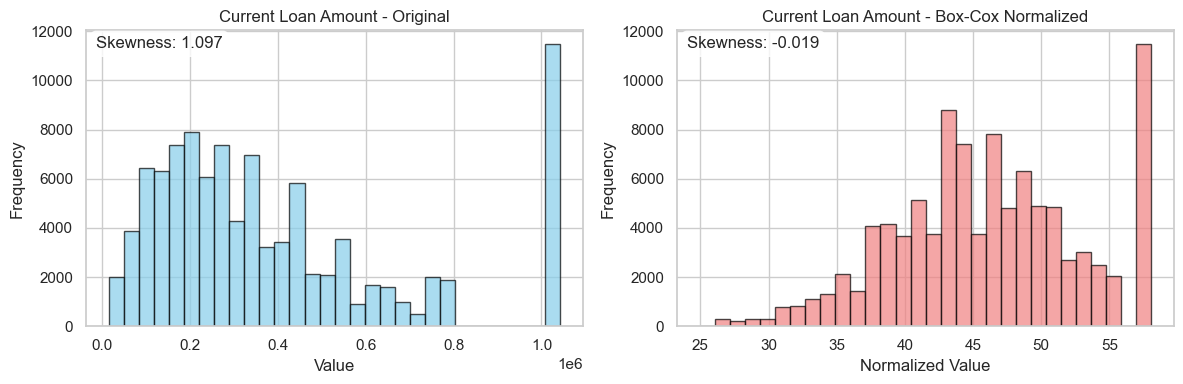

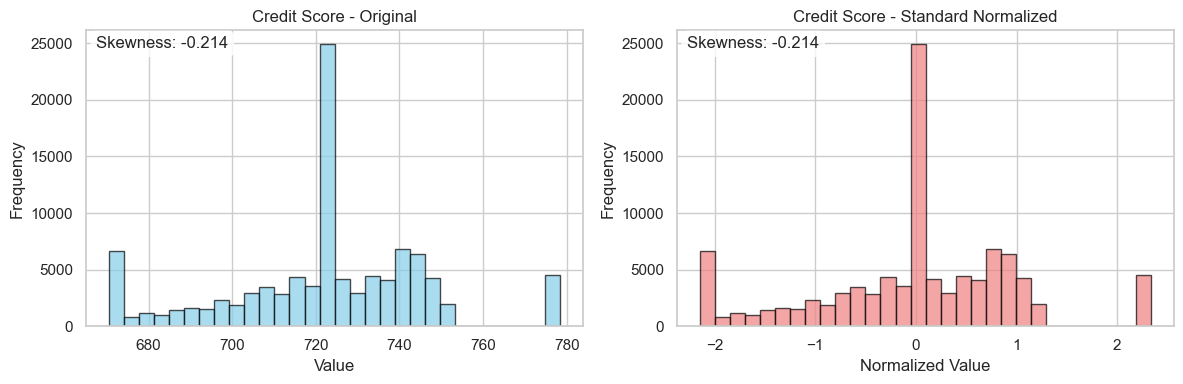

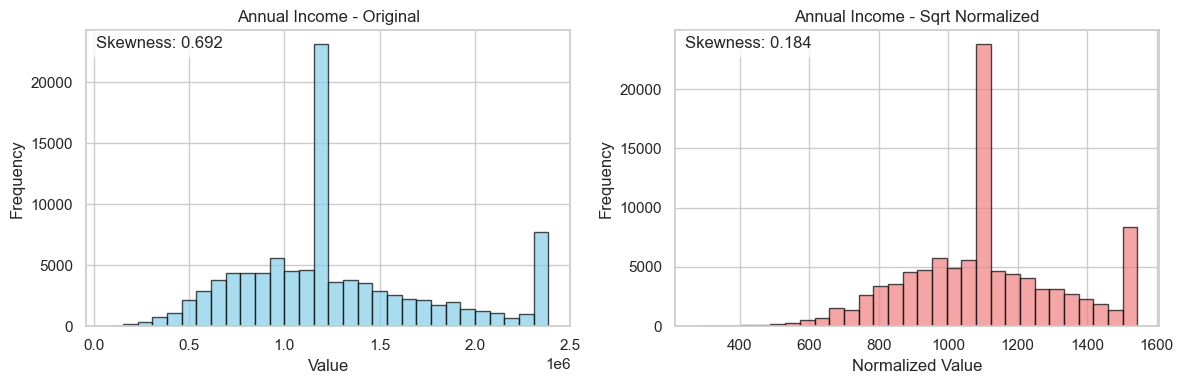


SKEWNESS IMPROVEMENT SUMMARY
                 Column  Original_Skewness  Normalized_Skewness  Improvement
    Current Loan Amount              1.097                0.019        1.077
           Credit Score              0.214                0.214        0.000
          Annual Income              0.692                0.184        0.508
Years of Credit History              0.906                0.412        0.495
Number of Open Accounts              0.874                0.300        0.574
    Maximum Open Credit              2.615                0.018        2.597

Normalized dataframe shape: (99794, 26)
New columns created: ['Current Loan Amount_normalized', 'Credit Score_normalized', 'Annual Income_normalized', 'Years of Credit History_normalized', 'Number of Open Accounts_normalized', 'Maximum Open Credit_normalized']


In [418]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def check_skewness(df, columns):
    """Check skewness of specified columns"""
    skewness_results = {}
    
    for col in columns:
        skewness = df[col].skew()
        skewness_results[col] = skewness
        print(f"{col}: Skewness = {skewness:.3f}")
        
        # Interpretation
        if abs(skewness) < 0.5:
            interpretation = "Approximately Normal"
        elif abs(skewness) < 1:
            interpretation = "Moderately Skewed"
        else:
            interpretation = "Highly Skewed"
        
        print(f"  -> {interpretation}")
    
    return skewness_results

def normalize_data(df, columns, method='log', create_new_columns=True):
    """
    Normalize data using various methods to handle skewness
    
    Parameters:
    df: DataFrame
    columns: list of column names to normalize
    method: 'log', 'sqrt', 'box-cox', 'yeo-johnson', 'standard', 'minmax'
    create_new_columns: if True, creates new columns with suffix, if False, modifies original
    """
    df_normalized = df.copy()  # Fixed: was df_cleaned() which is incorrect
    
    for column in columns:
        if column not in df_normalized.columns:
            print(f"Warning: Column '{column}' not found in dataframe")
            continue
            
        # Handle negative values for log transformation
        if method == 'log' and (df_normalized[column] <= 0).any():
            print(f"Warning: {column} contains non-positive values. Using log1p instead.")
            method = 'log1p'
        
        # Choose column name
        if create_new_columns:
            new_col_name = f'{column}_normalized'
        else:
            new_col_name = column
            
        try:
            if method == 'log':
                # Natural log transformation
                df_normalized[new_col_name] = np.log(df_normalized[column])
                
            elif method == 'log1p':
                # Log(1+x) transformation - handles zeros
                df_normalized[new_col_name] = np.log1p(df_normalized[column])
                
            elif method == 'sqrt':
                # Square root transformation
                df_normalized[new_col_name] = np.sqrt(df_normalized[column])
                
            elif method == 'box-cox':
                # Box-Cox transformation (requires positive values)
                if (df_normalized[column] <= 0).any():
                    print(f"Warning: {column} contains non-positive values. Cannot use Box-Cox.")
                    continue
                transformed, lambda_val = stats.boxcox(df_normalized[column])
                df_normalized[new_col_name] = transformed
                print(f"Box-Cox lambda for {column}: {lambda_val:.3f}")
                
            elif method == 'yeo-johnson':
                # Yeo-Johnson transformation (handles negative values)
                pt = PowerTransformer(method='yeo-johnson', standardize=False)
                df_normalized[new_col_name] = pt.fit_transform(df_normalized[[column]]).flatten()
                
            elif method == 'standard':
                # Standard scaling (z-score normalization)
                scaler = StandardScaler()
                df_normalized[new_col_name] = scaler.fit_transform(df_normalized[[column]]).flatten()
                
            elif method == 'minmax':
                # Min-Max scaling
                scaler = MinMaxScaler()
                df_normalized[new_col_name] = scaler.fit_transform(df_normalized[[column]]).flatten()
                
            else:
                print(f"Unknown method: {method}")
                continue
                
        except Exception as e:
            print(f"Error normalizing {column} with method {method}: {str(e)}")
            continue
    
    return df_normalized

def plot_before_after_normalization(df_original, df_normalized, columns, method):
    """Plot distributions before and after normalization"""
    
    n_cols = len(columns)
    fig, axes = plt.subplots(n_cols, 2, figsize=(12, 4*n_cols))
    
    if n_cols == 1:
        axes = axes.reshape(1, -1)
    
    for i, col in enumerate(columns):
        # Original distribution
        axes[i, 0].hist(df_original[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i, 0].set_title(f'{col} - Original')
        axes[i, 0].set_xlabel('Value')
        axes[i, 0].set_ylabel('Frequency')
        
        # Add skewness text
        skew_orig = df_original[col].skew()
        axes[i, 0].text(0.02, 0.98, f'Skewness: {skew_orig:.3f}', 
                       transform=axes[i, 0].transAxes, verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Normalized distribution
        normalized_col = f'{col}_normalized'
        if normalized_col in df_normalized.columns:
            axes[i, 1].hist(df_normalized[normalized_col], bins=30, alpha=0.7, 
                          color='lightcoral', edgecolor='black')
            axes[i, 1].set_title(f'{col} - {method.title()} Normalized')
            axes[i, 1].set_xlabel('Normalized Value')
            axes[i, 1].set_ylabel('Frequency')
            
            # Add skewness text
            skew_norm = df_normalized[normalized_col].skew()
            axes[i, 1].text(0.02, 0.98, f'Skewness: {skew_norm:.3f}', 
                           transform=axes[i, 1].transAxes, verticalalignment='top',
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

def suggest_normalization_method(df, columns):
    """Suggest the best normalization method based on skewness"""
    suggestions = {}
    
    for col in columns:
        skewness = abs(df[col].skew())
        has_negative = (df[col] < 0).any()
        has_zero = (df[col] == 0).any()
        
        if skewness < 0.5:
            suggestion = "standard"  # Already approximately normal
        elif skewness < 1:
            suggestion = "standard" if has_negative else "sqrt"
        else:  # Highly skewed
            if has_negative:
                suggestion = "yeo-johnson"
            elif has_zero:
                suggestion = "log1p"
            else:
                suggestion = "box-cox"
        
        suggestions[col] = suggestion
        print(f"{col}: Suggested method = {suggestion}")
    
    return suggestions

# Define your columns
continuous_columns = ['Current Loan Amount', 'Credit Score', 'Annual Income']
discrete_columns = ['Years of Credit History', 'Number of Open Accounts', 'Maximum Open Credit']
all_numeric_columns = continuous_columns + discrete_columns

# Step 1: Check original skewness
print("="*50)
print("ORIGINAL DATA SKEWNESS CHECK")
print("="*50)
original_skewness = check_skewness(df_cleaned, all_numeric_columns)

# Step 2: Get suggestions for normalization methods
print("\n" + "="*50)
print("NORMALIZATION METHOD SUGGESTIONS")
print("="*50)
suggestions = suggest_normalization_method(df_cleaned, all_numeric_columns)

# Step 3: Apply normalization based on suggestions (or use your preferred methods)
print("\n" + "="*50)
print("APPLYING NORMALIZATION")
print("="*50)

# Option 1: Use suggested methods
df_normalized = df_cleaned.copy()
for col, method in suggestions.items():
    print(f"Normalizing {col} using {method}...")
    df_normalized = normalize_data(df_normalized, [col], method=method)

# Option 2: Use your original approach (fixed)
# df_normalized = normalize_data(df_cleaned, continuous_columns, method='log')
# df_normalized = normalize_data(df_normalized, discrete_columns, method='standard')

# Step 4: Check skewness after normalization
print("\n" + "="*50)
print("NORMALIZED DATA SKEWNESS CHECK")
print("="*50)
normalized_columns = [f'{col}_normalized' for col in all_numeric_columns]
normalized_skewness = check_skewness(df_normalized, normalized_columns)

# Step 5: Create comparison plots
print("\n" + "="*50)
print("CREATING BEFORE/AFTER PLOTS")
print("="*50)

# Plot a few key columns for comparison
key_columns = continuous_columns[:3]  # Plot first 3 continuous columns
for col in key_columns:
    if col in df_cleaned.columns:
        method_used = suggestions.get(col, 'log')
        plot_before_after_normalization(df_cleaned, df_normalized, [col], method_used)

# Step 6: Summary of improvements
print("\n" + "="*50)
print("SKEWNESS IMPROVEMENT SUMMARY")
print("="*50)
improvement_summary = []
for col in all_numeric_columns:
    original_skew = abs(original_skewness[col])
    normalized_col = f'{col}_normalized'
    if normalized_col in df_normalized.columns:
        new_skew = abs(df_normalized[normalized_col].skew())
        improvement = original_skew - new_skew
        improvement_summary.append({
            'Column': col,
            'Original_Skewness': original_skew,
            'Normalized_Skewness': new_skew,
            'Improvement': improvement
        })

improvement_df = pd.DataFrame(improvement_summary)
print(improvement_df.to_string(index=False, float_format='%.3f'))

print(f"\nNormalized dataframe shape: {df_normalized.shape}")
print(f"New columns created: {[col for col in df_normalized.columns if '_normalized' in col]}")

# FEATURE ENGINEERING

In [419]:
df_normalized.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',
       'Loan_Status_Binary', 'Current Loan Amount_normalized',
       'Credit Score_normalized', 'Annual Income_normalized',
       'Years of Credit History_normalized',
       'Number of Open Accounts_normalized', 'Maximum Open Credit_normalized'],
      dtype='object')

In [420]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99794 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Loan ID                             99794 non-null  object 
 1   Customer ID                         99794 non-null  object 
 2   Loan Status                         99794 non-null  object 
 3   Current Loan Amount                 99794 non-null  float64
 4   Term                                99794 non-null  object 
 5   Credit Score                        99794 non-null  float64
 6   Annual Income                       99794 non-null  float64
 7   Years in current job                99794 non-null  object 
 8   Home Ownership                      99794 non-null  object 
 9   Purpose                             99794 non-null  object 
 10  Monthly Debt                        99794 non-null  float64
 11  Years of Credit History             99794 non-

In [ ]:
df_normalized.head()

# FEATURE SELECTION

In [39]:
print(df.columns.tolist())

['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term', 'Credit Score', 'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']


In [40]:
from sklearn.feature_selection import SelectKBest, f_classif

In [41]:
y = df['Credit Score']
y

0       747.0
1       734.0
2       709.0
3       727.0
4       744.0
        ...  
9995    731.0
9996    718.0
9997    725.0
9998    721.0
9999    748.0
Name: Credit Score, Length: 10000, dtype: float64

In [42]:
x = df.drop('Credit Score', axis=1)
x

,Loan ID,Customer ID,Current Loan Amount,Term,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,15.0,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,15.0,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,c4ab66f9-833c-43b8-879c-4f8bcb64dd14,8ee2002b-8fb6-4af0-ab74-25a1c23e7647,157806.0,Short Term,1514376.0,6 years,Rent,Debt Consolidation,4795.41,12.5,15.0,9.0,0.0,87058.0,234410.0,0.0,0.0
9996,bbd3a392-01b4-4e0e-9c28-b2a4a39beac7,6c306306-f5c2-4db5-b74a-af2895123ecb,132550.0,Short Term,763192.0,4 years,Home Mortgage,Debt Consolidation,12401.87,9.9,20.0,8.0,0.0,74309.0,329692.0,0.0,0.0
9997,da9870de-4280-46a3-8fc6-91cfe5bfde9d,cc94e25e-1060-4465-b603-194e122f0239,223212.0,Long Term,1168272.0,10+ years,Rent,Debt Consolidation,4354.42,27.2,15.0,8.0,1.0,99636.0,568370.0,1.0,0.0
9998,0cc8e0e0-1bc6-49d7-ad0f-0598b647458f,f90cf410-a34b-49e7-8af9-2b405e17b827,99999999.0,Short Term,972097.0,10+ years,Home Mortgage,Debt Consolidation,12232.20,16.8,24.0,8.0,1.0,184984.0,240658.0,0.0,0.0


In [43]:
# Step 0: Define features and target
# Assuming 'Risk' is your target column (replace it if different)
X = df.drop(columns=['Loan ID', 'Customer ID', 'Credit Score'])  # remove IDs + target
y = df['Credit Score']  # target variable

# If categorical features are not yet encoded, apply encoding
X_encoded = pd.get_dummies(X, drop_first=True)

In [44]:
# Select top features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected_array = selector.fit_transform(X_encoded, y)
selected_columns = X_encoded.columns[selector.get_support()]
X_selected = pd.DataFrame(X_selected_array, columns=selected_columns)

In [45]:
# Step 2: Univariate feature selection using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_encoded, y)

# Step 3: Get scores for each feature
anova_scores = pd.Series(selector.scores_, index=X_encoded.columns)
anova_scores.sort_values(ascending=False, inplace=True)



In [46]:
# (Optional) Print top features
print(anova_scores.head(10))

Term_Short Term               9.282894
Current Loan Amount           3.347459
Purpose_small_business        2.393357
Annual Income                 2.179524
Purpose_moving                2.144954
Purpose_other                 1.760522
Purpose_major_purchase        1.599377
Purpose_wedding               1.468080
Purpose_vacation              1.429917
Purpose_Debt Consolidation    1.357891
dtype: float64


# MODELING

In [421]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the data
print("Preparing data for modeling...")

# Define features and target
target = 'Loan_Status_Binary'

# Use normalized features where available, otherwise use original
feature_columns = [
    'Current Loan Amount_normalized',
    'Credit Score_normalized', 
    'Annual Income_normalized',
    'Years of Credit History_normalized',
    'Number of Open Accounts_normalized',
    'Maximum Open Credit_normalized',
    'Monthly Debt',
    'Months since last delinquent',
    'Number of Credit Problems',
    'Current Credit Balance',
    'Bankruptcies',
    'Tax Liens'
]

# Add categorical features (need to encode them)
categorical_features = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']

# 2. Encode categorical variables
df_model = df_normalized.copy()

# Label encode categorical variables
label_encoders = {}
for cat_col in categorical_features:
    le = LabelEncoder()
    df_model[f'{cat_col}_encoded'] = le.fit_transform(df_model[cat_col])
    label_encoders[cat_col] = le
    feature_columns.append(f'{cat_col}_encoded')

# 3. Prepare final feature matrix
X = df_model[feature_columns]
y = df_model[target]

print(f"Feature matrix shape: {X.shape}")
print(f"Target distribution:")
print(y.value_counts())
print(f"Default rate: {(1-y.mean())*100:.1f}%")

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# 5. Train models
print("\nTraining models...")

# Random Forest (good for interpretability and performance)
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
)

rf_model.fit(X_train, y_train)

# Logistic Regression (good baseline)
lr_model = LogisticRegression(
    random_state=42,
    class_weight='balanced',
    max_iter=1000
)

lr_model.fit(X_train, y_train)

# 6. Make predictions
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

lr_pred = lr_model.predict(X_test)
lr_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# 7. Evaluate models
print("\n" + "="*50)
print("MODEL EVALUATION")
print("="*50)

# Random Forest Results
print("\nRANDOM FOREST RESULTS:")
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# Logistic Regression Results
print("\nLOGISTIC REGRESSION RESULTS:")
print(f"ROC-AUC Score: {roc_auc_score(y_test, lr_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

Preparing data for modeling...
Feature matrix shape: (99794, 16)
Target distribution:
Loan_Status_Binary
1    77207
0    22587
Name: count, dtype: int64
Default rate: 22.6%

Train set shape: (79835, 16)
Test set shape: (19959, 16)

Training models...

MODEL EVALUATION

RANDOM FOREST RESULTS:
ROC-AUC Score: 0.7559

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.58      0.48      4517
           1       0.86      0.75      0.80     15442

    accuracy                           0.72     19959
   macro avg       0.64      0.67      0.64     19959
weighted avg       0.76      0.72      0.73     19959


LOGISTIC REGRESSION RESULTS:
ROC-AUC Score: 0.6132

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.54      0.38      4517
           1       0.82      0.61      0.70     15442

    accuracy                           0.59     19959
   macro avg       0.56      0.58      0


FEATURE IMPORTANCE
                               feature  importance
1              Credit Score_normalized    0.472714
0       Current Loan Amount_normalized    0.280658
2             Annual Income_normalized    0.067451
12                        Term_encoded    0.050696
5       Maximum Open Credit_normalized    0.024150
6                         Monthly Debt    0.023643
9               Current Credit Balance    0.018950
3   Years of Credit History_normalized    0.015428
14              Home Ownership_encoded    0.013116
4   Number of Open Accounts_normalized    0.009613


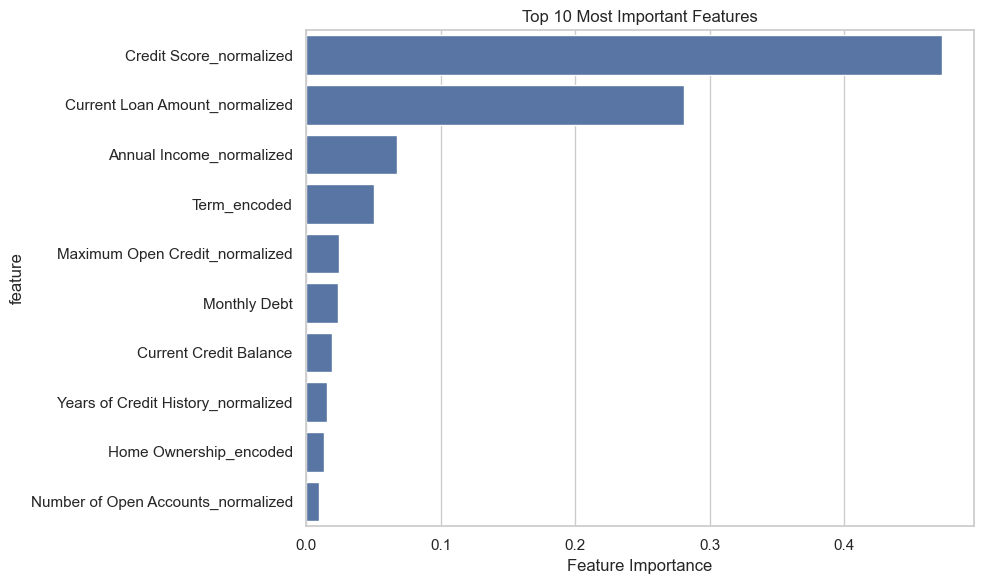

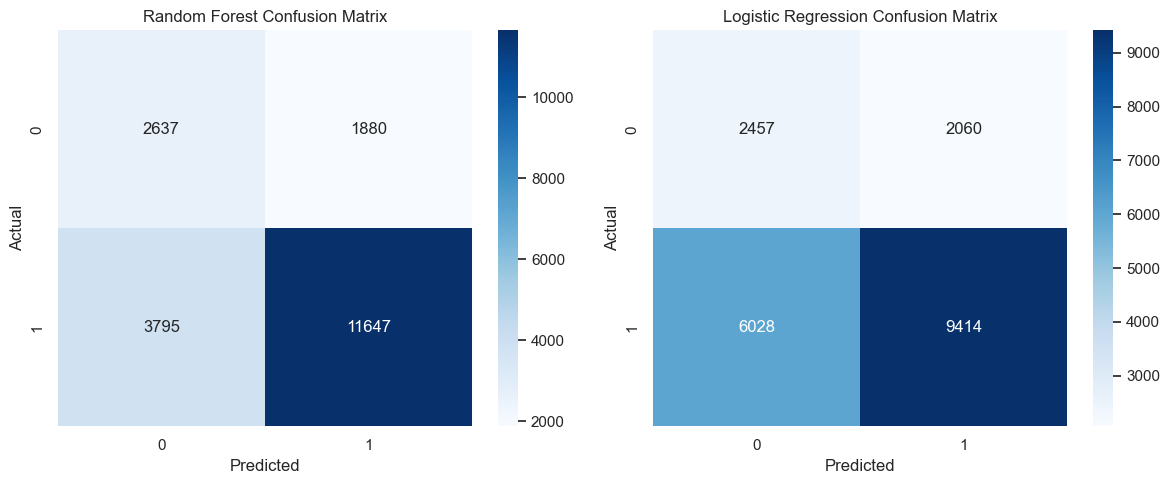

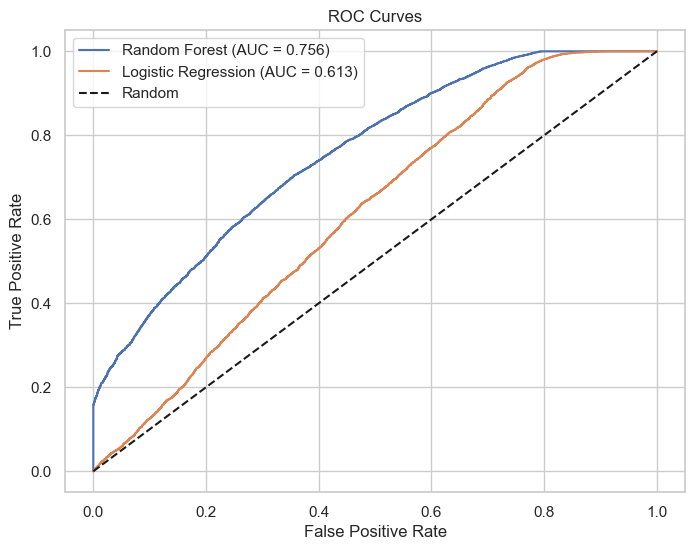

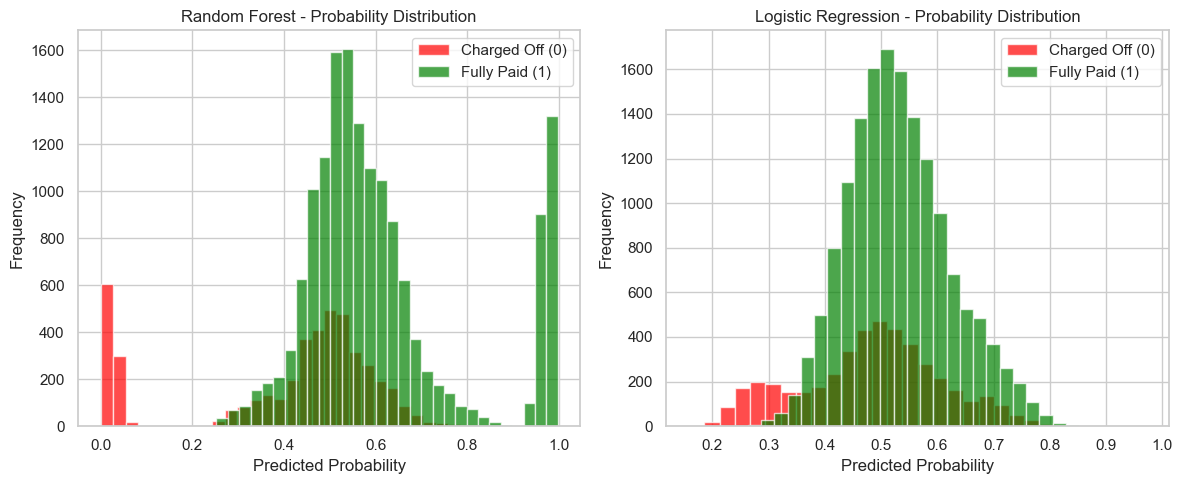


MODEL COMPARISON SUMMARY
              Model  ROC-AUC  Accuracy
      Random Forest   0.7559    0.7157
Logistic Regression   0.6132    0.5948


In [422]:
# 8. Feature Importance (Random Forest)
print("\n" + "="*50)
print("FEATURE IMPORTANCE")
print("="*50)

feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# 9. Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# 10. ROC Curves
plt.figure(figsize=(8, 6))

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_pred_proba):.3f})')

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred_proba)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, lr_pred_proba):.3f})')

# Random line
plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

# 11. Prediction probabilities distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(rf_pred_proba[y_test == 0], bins=30, alpha=0.7, label='Charged Off (0)', color='red')
plt.hist(rf_pred_proba[y_test == 1], bins=30, alpha=0.7, label='Fully Paid (1)', color='green')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Random Forest - Probability Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(lr_pred_proba[y_test == 0], bins=30, alpha=0.7, label='Charged Off (0)', color='red')
plt.hist(lr_pred_proba[y_test == 1], bins=30, alpha=0.7, label='Fully Paid (1)', color='green')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Logistic Regression - Probability Distribution')
plt.legend()

plt.tight_layout()
plt.show()

# 12. Model comparison summary
print("\n" + "="*50)
print("MODEL COMPARISON SUMMARY")
print("="*50)

comparison_data = {
    'Model': ['Random Forest', 'Logistic Regression'],
    'ROC-AUC': [roc_auc_score(y_test, rf_pred_proba), roc_auc_score(y_test, lr_pred_proba)],
    'Accuracy': [rf_model.score(X_test, y_test), lr_model.score(X_test, y_test)]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False, float_format='%.4f'))

In [ ]:
# 13. Save the best model (Random Forest typically performs better)
best_model = rf_model if roc_auc_score(y_test, rf_pred_proba) > roc_auc_score(y_test, lr_pred_proba) else lr_model
print(f"\nBest performing model: {'Random Forest' if best_model == rf_model else 'Logistic Regression'}")

# Example prediction function
def predict_loan_default(model, feature_values, feature_names):
    """
    Predict loan default probability for new data
    
    Parameters:
    model: trained model
    feature_values: list of feature values in same order as feature_names
    feature_names: list of feature names
    """
    # Create DataFrame with proper column names
    new_data = pd.DataFrame([feature_values], columns=feature_names)
    
    # Get prediction and probability
    prediction = model.predict(new_data)[0]
    probability = model.predict_proba(new_data)[0]
    
    return {
        'prediction': 'Fully Paid' if prediction == 1 else 'Charged Off',
        'probability_charged_off': probability[0],
        'probability_fully_paid': probability[1]
    }

print("\nModel training complete! Use the best_model for predictions.")
print("Feature columns used:", feature_columns)


Best performing model: Random Forest

Model training complete! Use the best_model for predictions.
Feature columns used: ['Current Loan Amount_normalized', 'Credit Score_normalized', 'Annual Income_normalized', 'Years of Credit History_normalized', 'Number of Open Accounts_normalized', 'Maximum Open Credit_normalized', 'Monthly Debt', 'Months since last delinquent', 'Number of Credit Problems', 'Current Credit Balance', 'Bankruptcies', 'Tax Liens', 'Term_encoded', 'Years in current job_encoded', 'Home Ownership_encoded', 'Purpose_encoded']


: 